# **Colourization of galaxy images**

Dataset: https://www.kaggle.com/datasets/redwankarimsony/top-100-hubble-telescope-images

# **Importing libraries**

In [1]:
import tensorflow as tf 
import os 
import pathlib
from pathlib import Path
import time 
import datetime 

from matplotlib import pyplot as plt 
from IPython.display import display
from IPython.display import clear_output 

2024-07-09 14:14:59.358703: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-09 14:14:59.358796: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-09 14:14:59.487319: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **Importing dataset**

In [2]:
dataset_name = 'Hubble telescope images'
dataset_pathname = "/kaggle/input"
dataset_path = Path(dataset_pathname)

# Checking the dataset

In [3]:
number_of_images=len(list(dataset_path.iterdir()))
print(f"Number of images:{number_of_images}")

Number of images:99


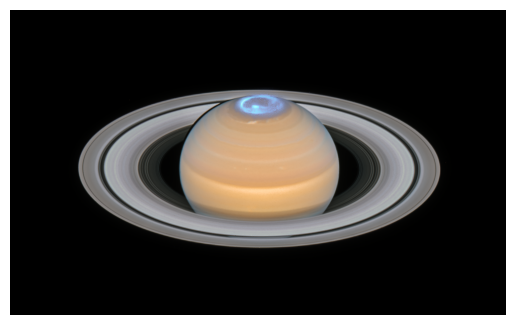

In [4]:
from PIL import Image

for image_path in dataset_path.iterdir():
    with Image.open(image_path) as img:        
        plt.imshow(img)        
        plt.axis('off')         
        plt.show()        
    break

# Resizing and converting images from .tif to .jpeg

Tensorflow does not work well with .tif images hence we call a function to convert the images and resize them to prevent memory issues and maintain consistency

In [5]:
import cv2
from pathlib import Path

dataset_path = Path("/kaggle/input")
output_path = Path("/kaggle/working/")

target_height = 256
target_width = 256

def resize_image(image, target_height, target_width):
    resized_image = cv2.resize(image, (target_width, target_height), interpolation=cv2.INTER_CUBIC)
    return resized_image

for file in dataset_path.iterdir():
    if file.is_file():
        file_path = str(file)      
        image = cv2.imread(file_path)
        resized_image = resize_image(image, target_height, target_width)
        
        # Change the file extension to JPEG for the output file
        output_file_path = output_path / (file.stem + '.jpg')
        
        # Write the resized image to the output directory as JPEG with quality 90
        cv2.imwrite(str(output_file_path), resized_image, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
        print(f"Converted and resized {file.name} to {output_file_path.name}")

print("Conversion and resizing complete.")

Converted and resized heic1815a.tif to heic1815a.jpg
Converted and resized heic0817a.tif to heic0817a.jpg
Converted and resized heic0406a.tif to heic0406a.jpg
Converted and resized potw1805a.tif to potw1805a.jpg
Converted and resized potw1802a.tif to potw1802a.jpg
Converted and resized potw1752a.tif to potw1752a.jpg
Converted and resized heic0206c.tif to heic0206c.jpg
Converted and resized heic0108a.tif to heic0108a.jpg
Converted and resized heic0503a.tif to heic0503a.jpg
Converted and resized heic0822a.tif to heic0822a.jpg
Converted and resized opo0511a.tif to opo0511a.jpg
Converted and resized heic1105a.tif to heic1105a.jpg
Converted and resized heic0411a.tif to heic0411a.jpg
Converted and resized opo0006a.tif to opo0006a.jpg
Converted and resized heic1716a.tif to heic1716a.jpg
Converted and resized heic1410a.tif to heic1410a.jpg
Converted and resized opo9942a.tif to opo9942a.jpg
Converted and resized potw1818a.tif to potw1818a.jpg
Converted and resized heic0707a.tif to heic0707a.jpg

# **Calling a function to store them real images separately and convert them into tensors**

In [6]:
import tensorflow as tf
from pathlib import Path

def ogimages(datapath):
    ogimages = []       # List to store decoded tensor images
    file_paths = []
    
    for file in datapath.rglob('*'):
        if file.is_file() and file.suffix.lower() in ['.jpg', '.jpeg', '.png', '.tif', '.tiff']:
            file_path = str(file)
            
            image = tf.io.read_file(file_path)
            image = tf.io.decode_image(image)            
            image = tf.cast(image, tf.float32)            
            ogimages.append(image)            
            file_paths.append(file_path)    
    return ogimages, file_paths

output_path = Path("/kaggle/working/")
real_images, rfiles = ogimages(output_path)

In [7]:
print(f"Type of rfiles: {type(rfiles)}")
print(f"Contents of rfiles: {rfiles[:5]}")  

Type of rfiles: <class 'list'>
Contents of rfiles: ['/kaggle/working/heic1520a.jpg', '/kaggle/working/heic0822a.jpg', '/kaggle/working/heic0910h.jpg', '/kaggle/working/heic1118a.jpg', '/kaggle/working/opo0501a.jpg']


# Converting to b/w
Calling a function to convert input images into black and white images and store them as tensors.

In [8]:
def input_images1(datapath):
    input_images = []
    file_paths = []
    for file in datapath.rglob('*'):
        if file.is_file() and file.suffix.lower() in ['.jpg', '.jpeg', '.png', '.tif', '.tiff']:
            file_path = str(file) 
            image = tf.io.read_file(file_path)
            image = tf.io.decode_image(image) 
            image = tf.cast(image, tf.float32)
            
            if image.shape[-1] == 3:
                image = tf.image.rgb_to_grayscale(image)
            
            input_images.append(image)
            file_paths.append(file_path)                
    return input_images, file_paths

bnw_images, bnwfiles = input_images1(output_path)
print(f"Number of grayscale images loaded: {len(bnw_images)}")

Number of grayscale images loaded: 99


Checking if functions have been executed properly

In [9]:
print(f"Real image shape: {real_images[0].shape}, dtype: {real_images[0].dtype}")
print(f"Grayscale image shape: {bnw_images[0].shape}, dtype: {bnw_images[0].dtype}")

Real image shape: (256, 256, 3), dtype: <dtype: 'float32'>
Grayscale image shape: (256, 256, 1), dtype: <dtype: 'float32'>


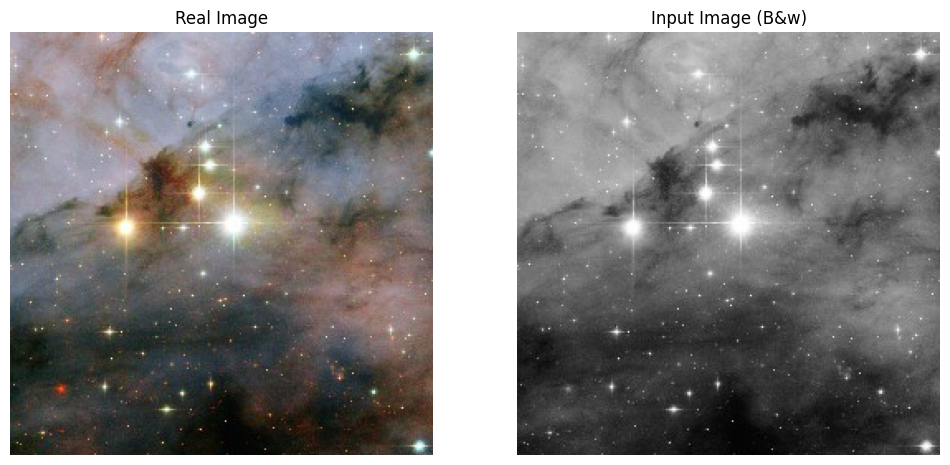

In [10]:
import matplotlib.pyplot as plt

real_image = real_images[1]
input_image = bnw_images[1]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(real_image / 255.0)
plt.title('Real Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(input_image / 255.0, cmap='gray')
plt.title('Input Image (B&w)')
plt.axis('off')
plt.show()

# Splitting the dataset into training, testing and validation sets

In [11]:
from sklearn.model_selection import train_test_split
import shutil

test_ratio = 0.2
val_ratio = 0.1

# Combine real_images and bnw_images into pairs
data_pairs = list(zip(real_images, bnw_images))
train_data, temp_data = train_test_split(data_pairs, test_size=test_ratio, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=val_ratio / (1 - test_ratio), random_state=42)

train_path = output_path / "train"
val_path = output_path / "val"
test_path = output_path / "test"

train_path.mkdir(parents=True, exist_ok=True)
val_path.mkdir(parents=True, exist_ok=True)
test_path.mkdir(parents=True, exist_ok=True)

def save_images(data_pairs, directory, real_subdir, input_subdir):
    real_dir = directory / real_subdir
    input_dir = directory / input_subdir
    
    real_dir.mkdir(parents=True, exist_ok=True)
    input_dir.mkdir(parents=True, exist_ok=True)
    
    for idx, (real_img, bnw_img) in enumerate(data_pairs):
        real_path = real_dir / f"image_{idx}.jpg"
        bnw_path = input_dir / f"image_{idx}.jpg"
        
        # Save images using TensorFlow's save_img function
        tf.keras.utils.save_img(real_path, real_img, scale=True)
        tf.keras.utils.save_img(bnw_path, bnw_img, scale=True)

save_images(train_data, train_path, "real", "input")
save_images(val_data, val_path, "real", "input") 
save_images(test_data, test_path, "real", "input")

print("Data split and saved into training, validation, and testing sets.")

Data split and saved into training, validation, and testing sets.


# Prepocessing images

In [12]:
BUFFER_SIZE = 99  # Buffer size for shuffling the dataset
BATCH_SIZE = 1    # Batch size for training (number of samples processed before the model is updated)
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [13]:
def resize(input_image, real_image, height, width):
  input_image = tf.image.resize_with_pad(input_image,target_height=height, target_width=width)                             
  real_image = tf.image.resize_with_pad(real_image,target_height=height, target_width=width)                             

  return input_image, real_image

def random_crop(input_image, real_image):
    min_channels = min(input_image.shape[-1], real_image.shape[-1])
    cropped_input = tf.image.random_crop(input_image, size=[IMG_HEIGHT, IMG_WIDTH, min_channels])
    cropped_real = tf.image.random_crop(real_image, size=[IMG_HEIGHT, IMG_WIDTH, 3])

    return cropped_input, cropped_real

@tf.function()
def random_jitter(input_image, real_image):
    input_image, real_image = resize(input_image, real_image, 286, 286)
    input_image, real_image = random_crop(input_image, real_image)

    # Randomly flip images horizontally with 50% probability
    if tf.random.uniform([]) > 0.5:
        input_image = tf.image.flip_left_right(input_image)
        real_image = tf.image.flip_left_right(real_image)

    return input_image, real_image


def normalize(input_image, real_image):
    input_image = tf.cast(input_image, tf.float32)
    real_image = tf.cast(real_image, tf.float32)
    
    input_image = (input_image / 127.5) - 1
    real_image = (real_image / 127.5) - 1
    
    return input_image, real_image

# Reviewing preprocessing functions

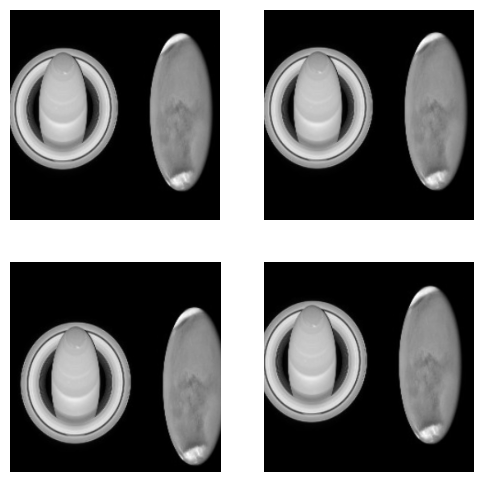

In [14]:
import matplotlib.pyplot as plt
import random

idx = random.randint(0, len(real_images) - 1)

inp = bnw_images[idx]
re = real_images[idx]

plt.figure(figsize=(6, 6))

for i in range(4):
    rj_inp, rj_re = random_jitter(inp, re)
    plt.subplot(2, 2, i + 1)
    plt.imshow(rj_inp / 255.0, cmap='gray')
    plt.axis('off')

plt.show()

# Creating an input data pipeline

In [15]:
def load_image_pair(input_path, real_path):
    print(f"load_image_pair - input_path type: {type(input_path)}, real_path type: {type(real_path)}")
    print(f"load_image_pair - input_path value: {input_path}, real_path value: {real_path}")

    input_image = tf.io.read_file(input_path)
    real_image = tf.io.read_file(real_path)
    print(f"load_image_pair - input_image type: {type(input_image)}, real_image type: {type(real_image)}")

    # Decode JPEG images: input_image as grayscale, real_image as RGB
    input_image = tf.io.decode_jpeg(input_image, channels=1) 
    real_image = tf.io.decode_jpeg(real_image, channels=3)
    print(f"load_image_pair - final input_image type: {type(input_image)}, final real_image type: {type(real_image)}")

    return input_image, real_image

def preprocess_image_pair(input_path, real_path):
    print(f"preprocess_image_pair - input_path type: {type(input_path)}, real_path type: {type(real_path)}")

    input_image, real_image = load_image_pair(input_path, real_path)
    print(f"preprocess_image_pair - input_image type: {type(input_image)}, real_image type: {type(real_image)}")

    input_image, real_image = resize(input_image, real_image, 286, 286)
    input_image, real_image = random_crop(input_image, real_image)
    input_image, real_image = normalize(input_image, real_image)
    print(f"preprocess_image_pair - final input_image type: {type(input_image)}, final real_image type: {type(real_image)}")

    return input_image, real_image

def create_dataset(input_paths, real_paths, batch_size, shuffle=True):
    dataset = tf.data.Dataset.from_tensor_slices((input_paths, real_paths))
    
    print(f"create_dataset - dataset: {dataset}")
    print(f"create_dataset - input_paths type: {type(input_paths)}, real_paths type: {type(real_paths)}")

    dataset = dataset.map(preprocess_image_pair, num_parallel_calls=tf.data.experimental.AUTOTUNE)

    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(input_paths))
        
    dataset = dataset.batch(batch_size)

    return dataset

batch_size = 1
train_dataset = create_dataset(rfiles, bnwfiles, batch_size=batch_size)

create_dataset - dataset: <_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>
create_dataset - input_paths type: <class 'list'>, real_paths type: <class 'list'>
preprocess_image_pair - input_path type: <class 'tensorflow.python.framework.ops.SymbolicTensor'>, real_path type: <class 'tensorflow.python.framework.ops.SymbolicTensor'>
load_image_pair - input_path type: <class 'tensorflow.python.framework.ops.SymbolicTensor'>, real_path type: <class 'tensorflow.python.framework.ops.SymbolicTensor'>
load_image_pair - input_path value: Tensor("args_0:0", shape=(), dtype=string), real_path value: Tensor("args_1:0", shape=(), dtype=string)
load_image_pair - input_image type: <class 'tensorflow.python.framework.ops.SymbolicTensor'>, real_image type: <class 'tensorflow.python.framework.ops.SymbolicTensor'>
load_image_pair - final input_image type: <class 'tensorflow.python.framework.ops.SymbolicTensor'>, final rea

In [16]:
def preprocess_test_image(input_path, real_path):
    print(f"preprocess_test_image - input_path type: {type(input_path)}, real_path type: {type(real_path)}")
    print(f"preprocess_test_image - input_path value: {input_path}, real_path value: {real_path}")

    input_image = tf.io.read_file(input_path)
    real_image = tf.io.read_file(real_path)
    print(f"preprocess_test_image - input_image type: {type(input_image)}, real_image type: {type(real_image)}")

    input_image = tf.io.decode_jpeg(input_image, channels=1) 
    real_image = tf.io.decode_jpeg(real_image, channels=3)
    print(f"preprocess_test_image - decoded input_image type: {type(input_image)}, decoded real_image type: {type(real_image)}")

    input_image, real_image = resize(input_image, real_image, IMG_HEIGHT, IMG_WIDTH)
    input_image, real_image = normalize(input_image, real_image)
    print(f"preprocess_test_image - final input_image type: {type(input_image)}, final real_image type: {type(real_image)}")

    return input_image, real_image

def create_test_dataset(input_paths, real_paths, batch_size=1):
    dataset = tf.data.Dataset.from_tensor_slices((input_paths, real_paths))
    
    print(f"create_test_dataset - dataset: {dataset}")
    print(f"create_test_dataset - input_paths type: {type(input_paths)}, real_paths type: {type(real_paths)}")

    dataset = dataset.map(preprocess_test_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    print(f"create_test_dataset - dataset after map: {dataset}")

    dataset = dataset.batch(batch_size)
    print(f"create_test_dataset - final dataset: {dataset}")

    return dataset

batch_size = 1
test_dataset = create_test_dataset(bnwfiles, rfiles, batch_size=batch_size)

create_test_dataset - dataset: <_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>
create_test_dataset - input_paths type: <class 'list'>, real_paths type: <class 'list'>
preprocess_test_image - input_path type: <class 'tensorflow.python.framework.ops.SymbolicTensor'>, real_path type: <class 'tensorflow.python.framework.ops.SymbolicTensor'>
preprocess_test_image - input_path value: Tensor("args_0:0", shape=(), dtype=string), real_path value: Tensor("args_1:0", shape=(), dtype=string)
preprocess_test_image - input_image type: <class 'tensorflow.python.framework.ops.SymbolicTensor'>, real_image type: <class 'tensorflow.python.framework.ops.SymbolicTensor'>
preprocess_test_image - decoded input_image type: <class 'tensorflow.python.framework.ops.SymbolicTensor'>, decoded real_image type: <class 'tensorflow.python.framework.ops.SymbolicTensor'>
preprocess_test_image - final input_image type: <class 'tensorf

# Defining generator (U-NET ARCHITECTURE)

In [17]:
OUTPUT_CHANNELS = 3

# Encoder

In [18]:
def downsample(filters, size, apply_batchnorm=True):
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    result.add(
        tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                               kernel_initializer=initializer, use_bias=False))

    if apply_batchnorm:
        result.add(tf.keras.layers.BatchNormalization())

    result.add(tf.keras.layers.LeakyReLU())

    return result

In [19]:
down_model = downsample(3, 4)
down_result = down_model(tf.expand_dims(inp, 0))
print(down_result.shape)

(1, 128, 128, 3)


# Decoder

In [20]:
def upsample(filters, size, apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    result = tf.keras.Sequential()
    result.add(
        tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                        padding='same',
                                        kernel_initializer=initializer,
                                        use_bias=False))
    
    result.add(tf.keras.layers.BatchNormalization())
    
    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))
    
    result.add(tf.keras.layers.ReLU())
    
    return result

In [21]:
up_model = upsample(3, 4)
up_result = up_model(down_result)
print(up_result.shape)

(1, 256, 256, 3)


Combining upsampler and downsampler

# **Visualizing generator**

In [25]:
def Generator():
    inputs = tf.keras.layers.Input(shape=[256, 256, 1])

    down_stack = [
        downsample(64, 4, apply_batchnorm=True),   # (batch_size, 128, 128, 64)
        downsample(128, 4, apply_batchnorm=True),  # (batch_size, 64, 64, 128)
        downsample(256, 4, apply_batchnorm=True),  # (batch_size, 32, 32, 256)
        downsample(512, 4, apply_batchnorm=True),  # (batch_size, 16, 16, 512)
        downsample(512, 4, apply_batchnorm=True),  # (batch_size, 8, 8, 512)
        downsample(512, 4, apply_batchnorm=True),  # (batch_size, 4, 4, 512)
        downsample(512, 4, apply_batchnorm=True),  # (batch_size, 2, 2, 512)
        downsample(512, 4, apply_batchnorm=True),  # (batch_size, 1, 1, 512)
    ]

    up_stack = [
        upsample(512, 4, apply_dropout=True),    # (batch_size, 2, 2, 1024)
        upsample(512, 4, apply_dropout=True),    # (batch_size, 4, 4, 1024)
        upsample(512, 4, apply_dropout=True),    # (batch_size, 8, 8, 1024)
        upsample(512, 4),                        # (batch_size, 16, 16, 1024)
        upsample(256, 4),                        # (batch_size, 32, 32, 512)
        upsample(128, 4),                        # (batch_size, 64, 64, 256)
        upsample(64, 4),                         # (batch_size, 128, 128, 128)
    ]

    initializer = tf.random_normal_initializer(0., 0.02)

    last = tf.keras.layers.Conv2DTranspose(3, 4,
                                           strides=2,
                                           padding='same',
                                           kernel_initializer=initializer,
                                           activation='tanh')  # (batch_size, 256, 256, 3)

    x = inputs
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])

    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = tf.keras.layers.Concatenate()([x, skip])

    # Apply the final convolutional layer to produce the output image
    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

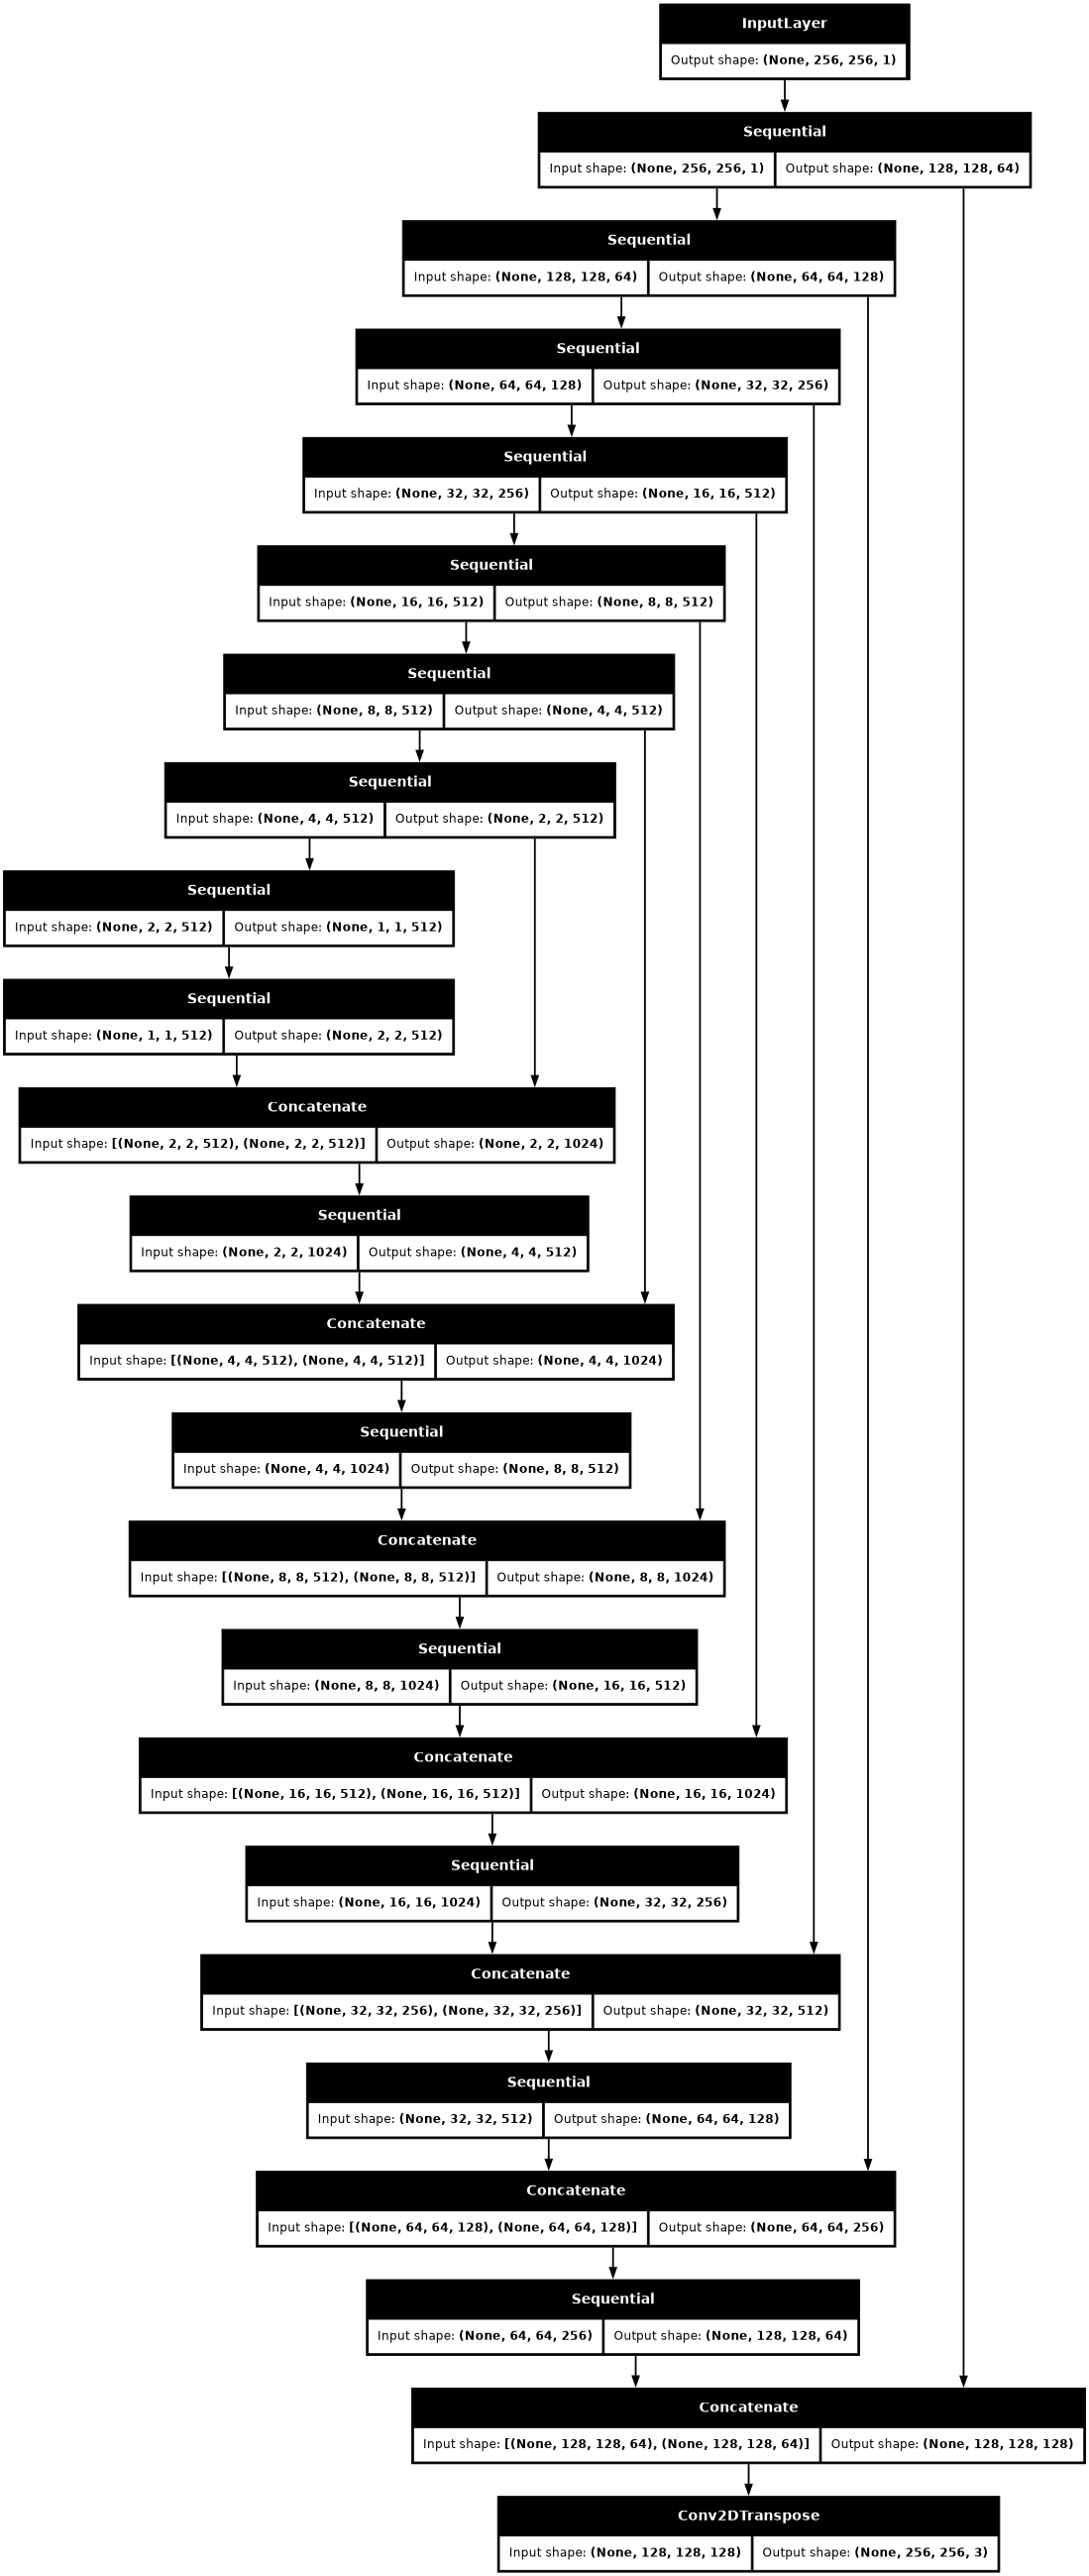

In [26]:
generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)

# Defining generator loss

In [28]:
LAMBDA = 100

In [29]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [30]:
def generator_loss(disc_generated_output, gen_output, target):
    # GAN loss: Binary crossentropy loss comparing the generated output against a matrix of ones
    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

    # L1 loss: Mean absolute error between the generated output and the target image
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

    # Total generator loss: GAN loss plus L1 loss weighted by a regularization parameter LAMBDA
    total_gen_loss = gan_loss + (LAMBDA * l1_loss)

    return total_gen_loss, gan_loss, l1_loss

# Defining discriminator (PatchGan)

In [45]:
def Discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)
    
    inp = tf.keras.layers.Input(shape=[256, 256, 1], name='input_image')
    tar = tf.keras.layers.Input(shape=[256, 256, 3], name='target_image')
    
    x = tf.keras.layers.Concatenate()([inp, tar])  
    
    down1 = downsample(128, 4, apply_batchnorm=False)(x)  
    down2 = downsample(256, 4)(down1)  
    down3 = downsample(512, 4)(down2)  
    
    zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)  
    conv1 = tf.keras.layers.Conv2D(1024, 4, strides=1, kernel_initializer=initializer, use_bias=False)(zero_pad1)  
    batchnorm1 = tf.keras.layers.BatchNormalization()(conv1)  
    leaky_relu1 = tf.keras.layers.LeakyReLU()(batchnorm1)  
    
    zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu1)  
    conv2 = tf.keras.layers.Conv2D(512, 4, strides=1, kernel_initializer=initializer, use_bias=False)(zero_pad2)  
    batchnorm2 = tf.keras.layers.BatchNormalization()(conv2)  
    leaky_relu2 = tf.keras.layers.LeakyReLU()(batchnorm2) 
    
    zero_pad3 = tf.keras.layers.ZeroPadding2D()(leaky_relu2)  
    last = tf.keras.layers.Conv2D(1, 4, strides=1, kernel_initializer=initializer)(zero_pad3)  
    
    return tf.keras.Model(inputs=[inp, tar], outputs=last)

Visualizing discriminator

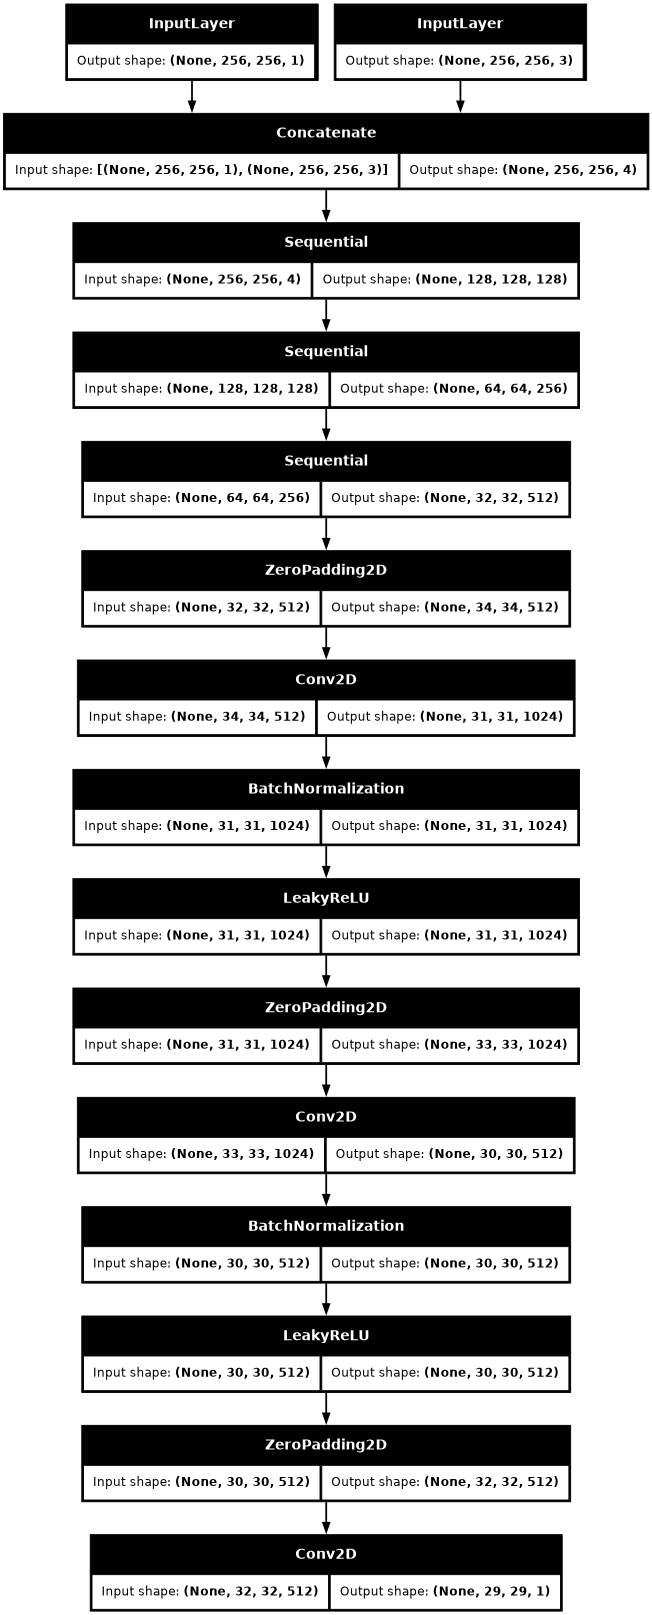

In [46]:
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)

# Defining discriminator loss

In [48]:
def discriminator_loss(disc_real_output, disc_generated_output):
    # Binary cross-entropy loss for real images
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)
    
    # Binary cross-entropy loss for generated (fake) images
    generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)
    
    # Total discriminator loss is the sum of losses from real and generated images
    total_disc_loss = real_loss + generated_loss
    
    return total_disc_loss

# Defining optimizers and checkpoint saver

In [49]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4)

In [50]:
import os

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

# Generating images

In [51]:
def generate_images(model, test_input, tar):
    prediction = model(test_input, training=True)
    
    plt.figure(figsize=(15, 15))
    display_list = [test_input[0], tar[0], prediction[0]]
    title = ['Input Image', 'Ground Truth', 'Predicted Image']
    
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        if i == 0:
            plt.imshow(display_list[i], cmap='gray')
        else:
            plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis('off')
    plt.show()

# Training

In [53]:
log_dir="logs/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

# **Calling a function to define PSNR value**

PSNR value is the ratio of the maximum value of the pixel to the noise (MSE) that affects the quality of the pixels. It is given by:

PSNR = 20 * log10(MAX) - 10 * log10(MSE)

In [55]:
def psnr(y_true, y_pred):
    max_pixel = 1.0  #normalised
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    psnr = tf.image.psnr(y_true, y_pred, max_val=max_pixel)
    return psnr

In [56]:
@tf.function
def train_step(input_image, target, step):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = generator(input_image, training=True)
        disc_real_output = discriminator([input_image, target], training=True)
        disc_generated_output = discriminator([input_image, gen_output], training=True)

        gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

    generator_gradients = gen_tape.gradient(gen_total_loss, generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

    with summary_writer.as_default():
        tf.summary.scalar('gen_total_loss', gen_total_loss, step=step // 1000)
        tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=step // 1000)
        tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=step // 1000)
        tf.summary.scalar('disc_loss', disc_loss, step=step // 1000)

    gen_output_normalized = (gen_output + 1) / 2
    target_normalized = (target + 1) / 2

    psnr_value = psnr(target_normalized, gen_output_normalized)

    return gen_total_loss, gen_gan_loss, gen_l1_loss, disc_loss, psnr_value

The actual training loop:

- Iterates over the number of steps.
- Every 10 steps print a dot (.).
- Every 1k steps: clear the display and run generate_images to show the progress.
- Every 5k steps: save a checkpoint.
- Saving the generator training every 5k steps

In [57]:
def fit(train_ds, test_ds, steps):
    # Fetch a single batch of test data for periodic visualization
    example_input, example_target = next(iter(test_ds.take(1)))
    start = time.time()

    total_psnr = tf.constant(0.0)
    psnr_count = tf.constant(0.0)

    for step, (input_image, target) in train_ds.repeat().take(steps).enumerate():
        if (step) % 1000 == 0:
            clear_output(wait=True)

            if step != 0:
                print(f'Time taken for 1000 steps: {time.time()-start:.2f} sec\n')

            start = time.time()

            generate_images(generator, example_input, example_target) 
            print(f"Step: {step//1000}k")

        gen_total_loss, gen_gan_loss, gen_l1_loss, disc_loss, psnr_value = train_step(input_image, target, step)
        total_psnr += tf.reduce_sum(psnr_value)
        psnr_count += tf.cast(tf.size(psnr_value), tf.float32)

        if (step + 1) % 10 == 0:
            print('.', end='', flush=True)

        if (step + 1) % 5000 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)
            generator.save(f'/kaggle/working/saved_generator_model_step_{step + 1}.h5')

    average_psnr = total_psnr / psnr_count if psnr_count > 0 else tf.constant(0.0)
    print(f"\nAverage PSNR over {psnr_count} steps: {average_psnr.numpy():.2f}")

Time taken for 1000 steps: 226.37 sec



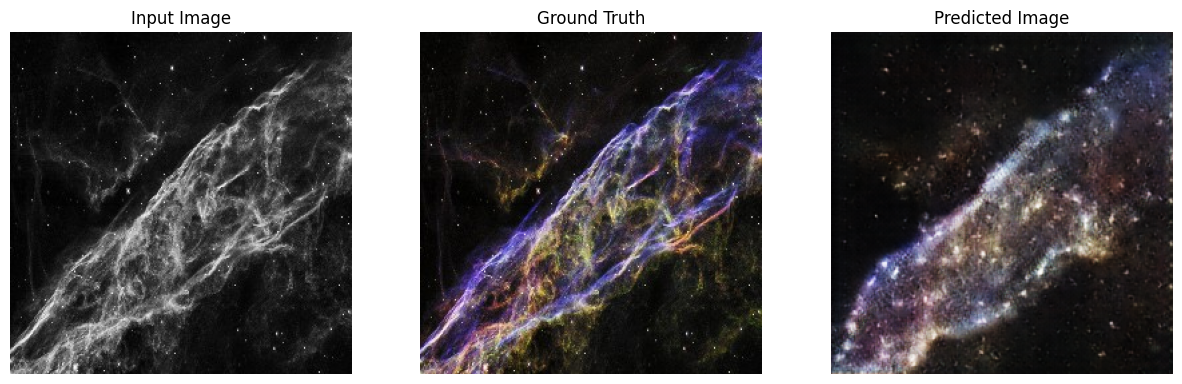

Step: 4k
....................................................................................................
Average PSNR over 5000.0 steps: 19.53


In [61]:
fit(train_dataset, test_dataset, steps=5000)

# Restore the latest checkpoint and test the network

In [62]:
ls {checkpoint_dir}

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


checkpoint                  ckpt-5.index
ckpt-1.data-00000-of-00001  ckpt-6.data-00000-of-00001
ckpt-1.index                ckpt-6.index
ckpt-2.data-00000-of-00001  ckpt-7.data-00000-of-00001
ckpt-2.index                ckpt-7.index
ckpt-3.data-00000-of-00001  ckpt-8.data-00000-of-00001
ckpt-3.index                ckpt-8.index
ckpt-4.data-00000-of-00001  ckpt-9.data-00000-of-00001
ckpt-4.index                ckpt-9.index
ckpt-5.data-00000-of-00001


In [63]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

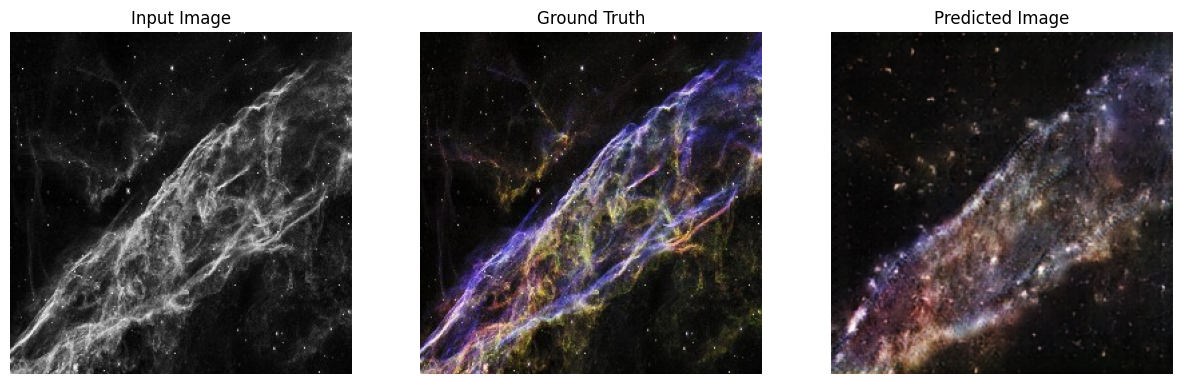

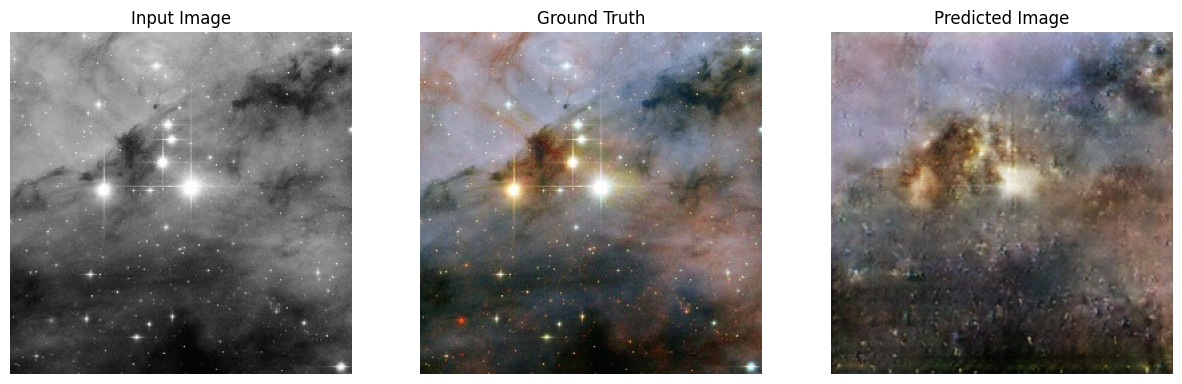

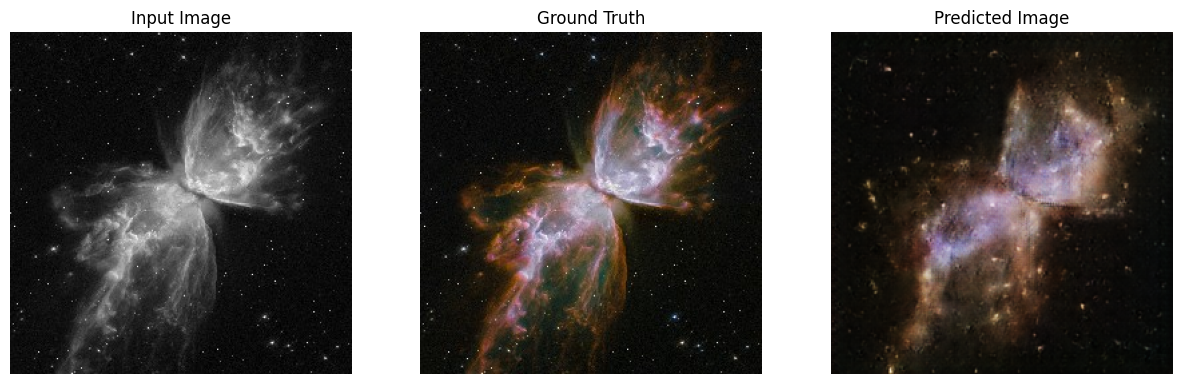

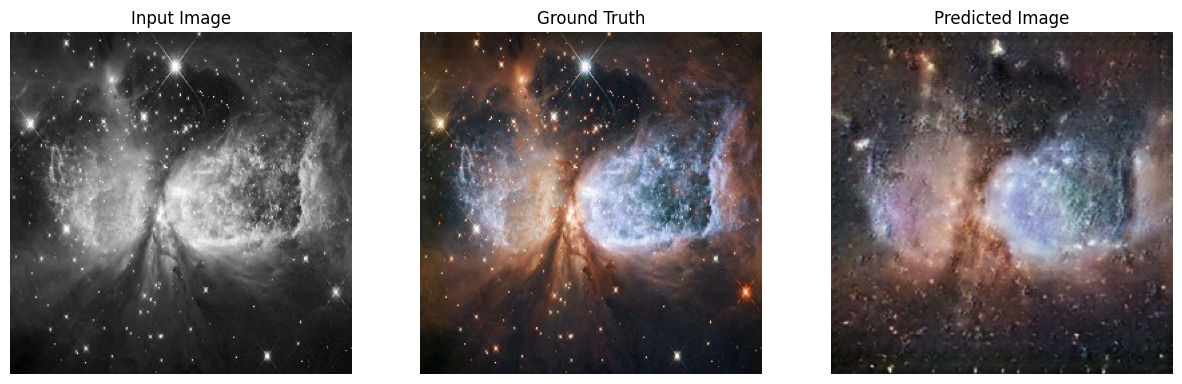

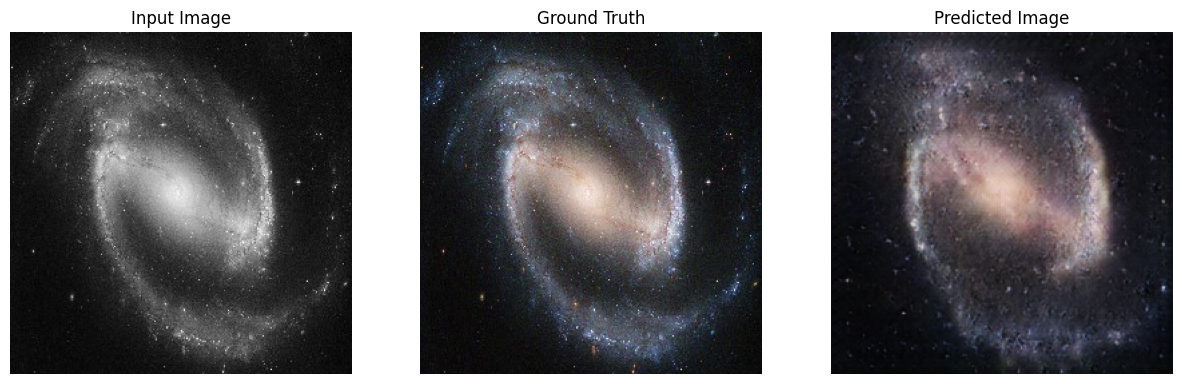

In [64]:
for inp, tar in test_dataset.take(5):
    generate_images(generator, inp, tar)

# **To Save the trained model**

In [ ]:
# Save the model as HDF5 format
tf.keras.models.save_model(generator, '/kaggle/working/saved_model_40k.h5', save_format='h5')

# Train for additional steps

In [ ]:
# Load the previously saved generator model
generator2 = tf.keras.models.load_model('/kaggle/working/saved_generator_model_step_40000.h5')

# Initialize the checkpoint manager
checkpoint_prefix = "/kaggle/working/checkpoint"
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

# Restore the latest checkpoint (if it includes optimizer state)
checkpoint.restore(tf.train.latest_checkpoint('/kaggle/working'))

def fit(train_ds, test_ds, steps):
    example_input, example_target = next(iter(test_ds.take(1)))
    start = time.time()

    total_psnr = tf.constant(0.0)
    psnr_count = tf.constant(0.0)

    for step, (input_image, target) in train_ds.repeat().take(steps).enumerate():
        if (step) % 1000 == 0:
            clear_output(wait=True)

            if step != 0:
                print(f'Time taken for 1000 steps: {time.time()-start:.2f} sec\n')

            start = time.time()

            generate_images(generator, example_input, example_target)
            print(f"Step: {step//1000}k")

        gen_total_loss, gen_gan_loss, gen_l1_loss, disc_loss, psnr_value = train_step(input_image, target, step)

        total_psnr += tf.reduce_sum(psnr_value)
        psnr_count += tf.cast(tf.size(psnr_value), tf.float32)

        # Training step
        if (step + 1) % 10 == 0:
            print('.', end='', flush=True)

        # Save (checkpoint) the model every 5k steps
        if (step + 1) % 5000 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)
            generator.save(f'/kaggle/working/saved_generator_model_step_{step + 1}.h5')

    average_psnr = total_psnr / psnr_count if psnr_count > 0 else tf.constant(0.0)
    print(f"\nAverage PSNR over {psnr_count} steps: {average_psnr.numpy():.2f}")

# Continue training for an additional 40,000 steps
fit(train_dataset, test_dataset, steps=40000)

# Visualise the new generator predictions

In [ ]:
generator3 = "/kaggle/working/saved_generator_model_step_80000.h5"
for inp, tar in test_dataset.take(5):
    generate_images(generator, inp, tar)

# **Conclusion**

- Regularisation improved the PSNR score.
- Further imrovements include training for more epochs as mentioned.
- To increase the efficiency transfer learning can be applied as well.
- PatchGAN seems to be the perfect architecture for discriminator here as it gives more focused feedback to the generator.